<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/F1.svg.png?raw=true" width = "300" height = "100" alt="Formula One Logo" align=center/></center>

# <font face="times"><font color="darkred"><center><b>QTM 151 Group Project: <br> Exploration of Countries' Performance as Drivers and Constructors in Formula One</b></center></font>

<font size="5"><font color="darkblue">
<center>Author: Jiuru Lyu, Jessie Ni, Sophia Xiao, Tiffany Yang (Group 17)</center>

## <font face="times" color="darkblue">Table of Contents</font>

<font face="times" size=3>

- [Table of Contents](#table-of-contents)
- [I. Introduction](#i-introduction)
- [II. Data Description](#ii-data-description)
  * [1. Introduction to Data Sets](#1-introduction-to-data-sets)
  * [2. Merging Data](#2-merging-data)
  * [3. Introduction to Columns](#3-introduction-to-columns)
- [III. Results](#iii-results)
  * [1. Bar Plot Comparison](#1-bar-plot-comparison)
  * [2. Map of Drivers' Wins](#2-map-of-drivers-wins)
  * [3. Map of Constructors' Wins](#3-map-of-constructors-wins)
- [IV. Discussion and Conclusion](#iv-disccusion-and-conclusion)
- [V. Reference](#v-reference)
- [VI. Appendix](#vi-appendix)
  * [A. Map of Drivers' Wins](#a-map-of-drivers-wins)
  * [B. Map of Constructors' Wins](#b-map-of-constructors-wins)

## <font face="times"><font color="darkblue">I. Introduction</font>


<font face="times" size=3>

Formula One has been one of the most popular and fastest car racing competitions in the world since 1950. It differs from other car racing competitions by using specifically open-wheel, single-seater, fossil-fueled cars.

A typical Formula One season consists of a series of races, known as Grands Prix, that takes place in various countries and continents around the world on either purpose-built circuits or closed public roads. Two championships are chosen each year, one for the driver (who can drive fastest) and one for the constructor (who makes the best cars). Famous drivers risk their lives on the tracks to compete for the honor. Constructors teams, usually consisting of hundreds of people behind the scene, keep pushing existent technology to the extreme and creating a symphony of aerodynamics. 

F1 is a very expensive and deadly sport, as the construction cost of one single car (including designing, building, maintaining, and transporting) can cost up to \$265,000,000 in a year. Only in 2019 did F1 start to set a cost cap of \$175 million. However, when Covid swept over the world in 2020, a lot of teams fell into a catastrophic financial situation. F1 consequently dropped the cost cap to \$145 million. 

For a lot of constructors, racing in Formula is a strategy for not only breaking the edge-on car designs but also for marketing purposes(Ferrari said it in their 2020 annual report). Not only that, the technology applied to F1 cars sometimes will be further developed and used in commercial everyday car models as well. 

Our research project investigates a list of top constructors and drivers in the 21st century. We will extract information necessary from 6 big data sets, and try to see whether the top drivers and top constructors.

<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/F1_super.jpeg?raw=true" width = "1024" height = "576" alt="Formula One Animation" align=center/></center>

## <font face="times"><font color="darkblue">II. Data Description</font>

In [1]:
# Import libraries

# basic libraries
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

### <font color="darkblue" face="times"> 1. Introduction to Data Sets</font>

In [2]:
# Import data sets

drivers = pd.read_csv("data_raw/drivers.csv")
driver_standings = pd.read_csv("data_raw/driver_standings.csv")
races = pd.read_csv("data_raw/races.csv")
constructors = pd.read_csv("data_raw/constructors.csv")
constructor_standings = pd.read_csv("data_raw/constructor_standings.csv")

<font face="times" size=3>

We used the `drivers`, `driver_standings`, `races`, `constructors`, and `constructor_standings` tables from the Formula 1 dataset. In this section, we will briefly go over each of the data sets by introducing its columns and basic statistics.

<font face="times" size=3>

The `drivers` file contains information on the drivers competing in Formula One races. Each row contains information on a driver, including the driverId, their full name, their 3-letter code, their number, nationality, and a URL to the driver’s Wikipedia page. This table has 857 observations. We also attach the information on the table from the code book. Those columns with a red box are those involved in our further analysis.

In [29]:
print(f"\
        drivers row number: {len(drivers)}\n\
        drivers column numbers: {len(drivers.columns)}\n\
        drivers column names: {list(drivers.columns)}\n")

        drivers row number: 857
        drivers column numbers: 9
        drivers column names: ['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url']



<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/drivers.png?raw=true" width = "1000" height = "260" alt="drivers table" align=center/></center>

<font face="times" size=3>

The `driver_standings` file contains information on the drivers' standings in Formula One races. Each row has data on a driver’s standing per race. The data includes points (the number of points the driver earned in the specific race), wins (either 1 or 0, representing whether or not the driver won the race), and position (the driver’s position in the race).  This table has 33902 observations.

In [30]:
print(f"\
        driver_standings row number: {len(driver_standings)}\n\
        driver_standings column numbers: {len(driver_standings.columns)}\n\
        driver_standings column names: {list(driver_standings.columns)}\n")

        driver_standings row number: 33902
        driver_standings column numbers: 7
        driver_standings column names: ['driverStandingsId', 'raceId', 'driverId', 'points', 'position', 'positionText', 'wins']



<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/driver_standings.png?raw=true" width = "1000" height = "200" alt="driver_standings table" align=center/></center>

<font face="times" size=3>

The table `races` contains information on Formula One races that have taken place since 1950. The years are from 1950 to 2023. Each row contains information about a unique race, including the year the race took place, the round of the race, the name of the race, the date of the race (year, month, and day), the time of the race, a URL link to the race’s Wikipedia page, date and time information on: the first to third free practice sessions, the qualifying session, and the sprint race. This table has 1102 observations.

In [31]:
print(f"\
        races row number: {len(races)}\n\
        races column numbers: {len(races.columns)}\n\
        races column names: {list(races.columns)}\n")

        races row number: 1102
        races column numbers: 18
        races column names: ['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time']



<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/races.png?raw=true" width = "1000" height = "400" alt="races table" align=center/></center>

<font face="times" size=3>

The table `constructors` contains information on the teams (constructors) that compete in Formula One racing. Each row has information on a unique constructor, including the constructorId (a numeric identifier), the constructorRef (a string representing the name of the constructor), name (the actual name of the constructor, such as ‘McLaren’), nationality (the nationality of the constructor), and url (a URL linking the constructor’s Wikipedia page). This table has 211 rows.

In [33]:
print(f"\
        constructors row number: {len(constructors)}\n\
        constructors column numbers: {len(constructors.columns)}\n\
        constructors column names: {list(constructors.columns)}\n")

        constructors row number: 211
        constructors column numbers: 5
        constructors column names: ['constructorId', 'constructorRef', 'name', 'nationality', 'url']



<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/constructors.png?raw=true" width = "1000" height = "200" alt="constructor table" align=center/></center>

<font face="times" size=3>

The table `constructor_standings` provides information on the points, position, and wins for each constructor in Formula One races. Each row contains data for constructor standings for each race, including the number of points earned per season, the race id, the position of each constructor, and wins (the count of wins per season). 
There are 12941 observations in this table.

In [34]:
# Basic statistics of the data sets
print(f"\
        constructor_standings row number: {len(constructor_standings)}\n\
        constructor_standings column numbers: {len(constructor_standings.columns)}\n\
        constructor_standings column names: {list(constructor_standings.columns)}\n")

        constructor_standings row number: 12941
        constructor_standings column numbers: 7
        constructor_standings column names: ['constructorStandingsId', 'raceId', 'constructorId', 'points', 'position', 'positionText', 'wins']



<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/constructor_standings.png?raw=true" width = "1000" height = "200" alt="constructor_standings table" align=center/></center>

### <font face="times"><font color="darkblue">2. Merging Data</font>

<font face="times" size=3>

To conduct the analysis on where the top drivers come from, we first merged the data set `drivers` with `driver_standings` on the primary key of `driverId`, and this joined data set is named `driver_join`. Then, we subset `driver_join` by selecting data from the 21st century, with the subset named `driver_join_21st`.

In [4]:
# Join drivers and driver standings

driver_join = pd.merge(drivers[["driverId", "forename", "surname", "nationality"]],
                       driver_standings[["raceId", "driverId", "points", "wins"]],
                       how = "left",
                       on = "driverId")

In [5]:
# Subsetting data set by selecting data only in the 21th century.

driver_join_21st = (pd.merge(driver_join,
                             races[["raceId", "year"]],
                             how = "left",
                             on = "raceId").query('year >= 2000')) # select data from 21st century

<font face="times" size=3>

Similarly, we merge the data of constructors using the same procedure. We first merged the data set `constructors` with `constructor_standings` on the primary key of `constructorId`, and this joined data set is named `constructor_join`. Then, we subset `constructor_join` by selecting data from the 21st century, with the subset named `constructor_join_21st`. 

In [6]:
# Join constructors and constructor standings

constructor_join = pd.merge(constructors[["constructorId", "nationality"]],
                            constructor_standings[["raceId", "constructorId", "points", "wins"]],
                            how = "left",
                            on = "constructorId")

In [7]:
# Subsetting data set by selecting data only in the 21th century.

constructor_join_21st = (pd.merge(constructor_join,
                                  races[["raceId", "year"]],
                                  how = "left",
                                  on = "raceId").query('year >= 2000')) # select data from 21st century

<font face="times" size=3>

To further clean our data, we aggregate the data set to compute the sums of wins of drivers by nationality, with 0 or NA values omitted. This final data set is called `driver_nationality`.

In [8]:
# Data Cleaning

# compute sum_wins by nationality

driver_nationality = (driver_join_21st.groupby("nationality")
                                      .agg(sum_wins_drivers = ("wins", "sum"))
                                      .query("sum_wins_drivers != 0") # omit 0 values
                                      .sort_values("sum_wins_drivers", ascending = False)
                                      .reset_index())

<font face="times" size=3>

Similarly, we aggregate the data set to compute the sums of wins of constructors by nationality, with 0 or NA values omitted. This final data set is called `constructor_nationality`.

In [9]:
# Aggregating the sum of wins of constructors by nationality.

constructor_nationality = (constructor_join_21st.groupby("nationality")
                                                .agg(sum_wins_constructor = ("wins", "sum"))
                                                .query("sum_wins_constructor != 0") # omiit 0 numbers
                                                .sort_values("sum_wins_constructor", ascending = False)
                                                .reset_index())

### <font face="times"><font color="darkblue">3. Introduction to Columns</font>

<font face="times" size=3>

Dealing with `driver_nationality`, we will primarily use the `nationality` column and the `sum_wins_drivers`. Here are some descriptive statistics for those columns.

In [10]:
# Summary of nationality of drivers

driver_nationality["nationality"].value_counts()

German        1
British       1
Dutch         1
Spanish       1
Finnish       1
Australian    1
Brazilian     1
Monegasque    1
Italian       1
Mexican       1
Colombian     1
French        1
Venezuelan    1
Polish        1
Name: nationality, dtype: int64

In [11]:
# Summary of sum of wins by nationality of drivers

driver_nationality["sum_wins_drivers"].describe()

count      14.000000
mean      309.000000
std       454.489231
min        12.000000
25%        37.250000
50%       109.500000
75%       355.500000
max      1384.000000
Name: sum_wins_drivers, dtype: float64

<font face="times" size=3>

In the data set `constructor_nationality`, we will also primarily use the `nationality` column and the `sum_wins_drivers`. Here are some descriptive statistics for those columns.

In [12]:
# Summary of nationality of drivers

constructor_nationality["nationality"].value_counts()

German      1
Italian     1
Austrian    1
British     1
French      1
Irish       1
Japanese    1
Name: nationality, dtype: int64

In [13]:
constructor_nationality["sum_wins_constructor"].describe()

count       7.000000
mean      618.142857
std       525.242620
min         6.000000
25%       125.500000
50%       784.000000
75%      1033.500000
max      1219.000000
Name: sum_wins_constructor, dtype: float64

## <font face="times"><font color="darkblue">III. Results</font>

### <font face="times"><font color="darkblue">1. Bar Plot Comparison</font>

<font face="times" size=3>

Firstly, we will create a plot to compare the drivers' sum of wins and the constructors' sum of wins by `nationality`. 

<AxesSubplot: title={'center': 'Sum of Wins by Nationality of Constructors'}, xlabel='sum_wins_constructor', ylabel='nationality'>

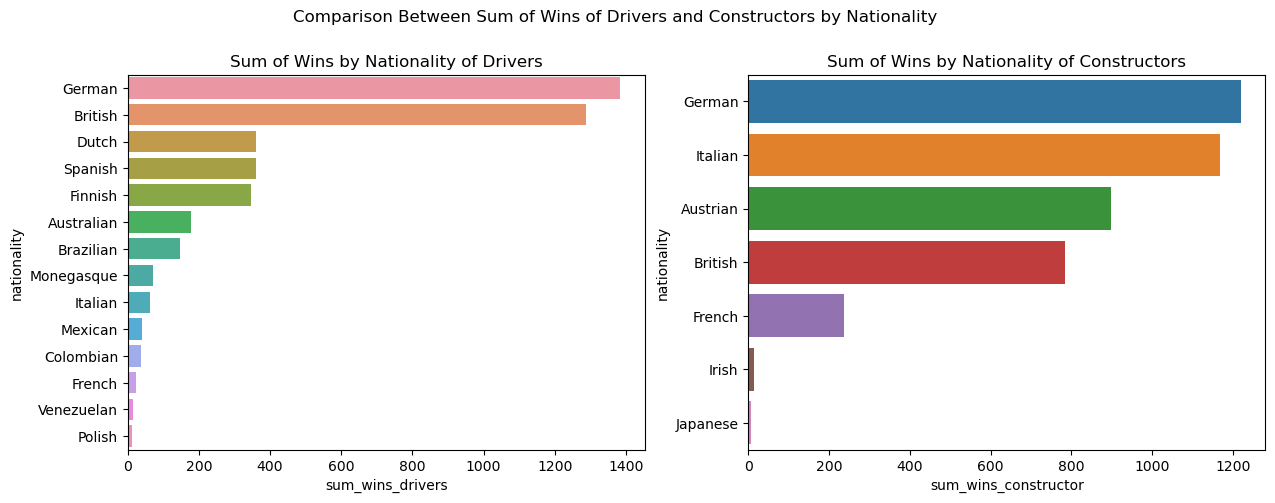

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle("Comparison Between Sum of Wins of Drivers and Constructors by Nationality")
plt.subplots_adjust(bottom = 0.1, right = 1, top = 0.85)

axes[0].set_title("Sum of Wins by Nationality of Drivers")
sns.barplot(ax = axes[0], data = driver_nationality, y = "nationality", x = "sum_wins_drivers")

axes[1].set_title("Sum of Wins by Nationality of Constructors")
sns.barplot(ax = axes[1], data = constructor_nationality, y = "nationality", x = "sum_wins_constructor")

<font face="times" size=3>

**Comments**: From the comparison, we can observe that German is at the top of the sum of wins of both drivers and constructors. Italians are better constructors than drivers, whereas the British seem to be better drivers than constructors. 

### <font face="times"><font color="darkblue">2. Map of Drivers' Wins</font>

<font face="times" size=3>

To better understand the geographical distribution of the sum of wins of drivers and constructors, we decide to draw a map to present the sum of wins by nationality.

<font face="times" size=3>

Firstly, we use dictionaries to convert nationality to countries' names. 

In [15]:
# Convert nationality to nation, so that we can plot the data onto a map
driver_nationality_to_nation = {"British": "United Kingdom",
                                "German" : "Germany",
                                "Brazilian": "Brazil",
                                "French": "France",
                                "Finnish" : "Finland",
                                "Dutch" : "Denmark",
                                "Spanish": "Spain",
                                "Australian": "Australia",
                                "Italian" : "Italy",
                                "Monegasque" : "Monaco",
                                "Mexican" : "Mexico",
                                "Colombian" : "Colombia",
                                "Venezuelan" : "Venezuela",
                                "Polish" : "Poland"}

driver_nation = driver_nationality.replace(driver_nationality_to_nation)

<font face="times" size=3>

Then, we merge the `driver_nation` with the `world` data set obtained from the `geopandas` package. Through this method, we get the geographical information (such as longitude and latitude) of each country.

In [16]:
# Obtain geographical data from geopandas
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge with the driver_nation data
driver_nation_gpd = pd.merge(world, 
                             driver_nation, 
                             left_on = "name", 
                             right_on = "nationality", 
                             how = "inner") # use inner join to omit unnecessary data

<font face="times" size=3>

Then, we use the `Map` object from the `folium` package to draw the map.

In [23]:
# Create a map from folium
driver_nation_map = folium.Map(location = [0, 0], zoom_start = 2)

# Add color layers onto the map
folium.Choropleth(geo_data = driver_nation_gpd,
                  name = "choropleth",
                  data = driver_nation_gpd,
                  columns = ["nationality", "sum_wins_drivers"],
                  key_on = "feature.properties.name",
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "sum_wins of drivers").add_to(driver_nation_map)

# Add labels onto the map (so when clickling on the country, the data information will be present)
folium.GeoJson(
    driver_nation_gpd,
    name = "labels",
    style_function = lambda x: {
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0,
    },
    tooltip = folium.GeoJsonTooltip(fields = ["sum_wins_drivers"], aliases = ["Sum of Wins in 21th Century"]),
    highlight_function = lambda x: {
        "fillColor": "white",
        "color": "black",
        "weight": 1.5,
        "dashArray": "5, 5",
        "fillOpacity": 0.7,
    },
    show = True,
).add_to(driver_nation_map)

folium.LayerControl().add_to(driver_nation_map)

driver_nation_map

<font face="times" size=3>

*Note: If the interactive map is not displayed as desired, we attached a screenshot of the map in [Appendix A](#a-map-of-drivers-wins).*

<font face="times" size=3>

**Comment**: As we can see from the map, the major top drivers are from European countries. Though some top drivers are also from South America, the sums of their wins are relatively lower than those of European drivers.

### <font face="times"><font color="darkblue">3. Map of Constructors' Wins</font>

<font face="times" size=3>

We then used the same procedure to obtain a map illustrating the constructors' distribution on the map by the sum of wins. 

In [18]:
# Convert nationality to nation, so that we can plot the data onto a map
# Then merge the nation data with the geographical data
constructor_nationality_to_nation = {"British": "United Kingdom",
                                     "German" : "Germany",
                                     "French": "France",
                                     "Japanese" : "Japan",
                                     "Italian" : "Italy",
                                     "Austrian" : "Austria",
                                     "Irish" : "Ireland"}

constructor_nation = constructor_nationality.replace(constructor_nationality_to_nation)

constructor_nation_gpd = pd.merge(world, 
                                  constructor_nation, 
                                  left_on = "name", 
                                  right_on = "nationality", 
                                  how = "inner")

In [36]:
# Create a map, add filled layers, and add labels
constructor_nation_map = folium.Map(location = [50, 40], zoom_start = 2.5)

folium.Choropleth(geo_data = constructor_nation_gpd,
                  name = "choropleth",
                  data = constructor_nation_gpd,
                  columns = ["nationality", "sum_wins_constructor"],
                  key_on = "feature.properties.name",
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "sum_wins of constructors").add_to(constructor_nation_map)

folium.GeoJson(
    constructor_nation_gpd,
    name = "labels",
    style_function = lambda x: {
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0,
    },
    tooltip = folium.GeoJsonTooltip(fields = ["sum_wins_constructor"], aliases = ["Sum of Wins in 21th Century"]),
    highlight_function = lambda x: {
        "fillColor": "white",
        "color": "black",
        "weight": 1.5,
        "dashArray": "5, 5",
        "fillOpacity": 0.7,
    },
    show = True,
).add_to(constructor_nation_map)

folium.LayerControl().add_to(constructor_nation_map)

constructor_nation_map

<font face="times" size=3>

*Note:*
- *If the interactive map is not displayed as desired, we attached a screenshot of the map in [Appendix B](#b-map-of-constructors-wins).*
- *The small shaded area in South America is an oversea territory of France.*

<font face="times" size=3>

**Comment**: Again, as we can see from the map, the top constructors are still major from the European countries. Japan is the only top constructor that is from outside Europe.

## <font face="times"><font color="darkblue">IV. Disccusion and Conclusion</font>

<font face="times" size=3>

The final project involved an analysis of the number of wins per driver and a summary of the countries with the highest number of wins from the year 2000 in the F1 competition. Our primary objective was to identify the countries that have been dominating the motor racing industry in recent years. To fulfill this goal, we merged the data set and applied subsetting criteria. We also aggregated the data to find the summed number of wins for each country for drivers and constructors, respectively. In terms of results, we first drew a line plot to represent the trends in their performance over time. We found that the top three countries with the highest number of wins of drivers since 2000 are Germany, Britain, and Dutch. On the other hand, the top three countries with the highest number of wins of constructors are Germany, Italy, and Australia. Meanwhile, we used two maps to represent the sum of wins of constructors and drivers by different countries. The two maps reveal that the top constructors and drivers mainly come from European countries, and South American countries are better drivers instead of constructors. Overall, this project deeply analyzes the relationship between the sum of wins and countries, which provides valuable insights into the trends in motor racing over the past two decades.

## <font face="times" color="darkblue">V. Reference</font>

<font face="times" size=3>

- Figure 1. Formula One Logo. *Wikimedia*, https://commons.wikimedia.org/wiki/File:F1.svg
- Figure 2. Formula One Competition. *Sky Sports*, https://www.skysports.com/f1/news/12433/12567851/formula-1-on-sky-sports-set-to-be-broadcast-in-high-dynamic-range-hdr-for-the-first-time-in-its-history

## <font face="times" color="darkblue">VI. Appendix</font>

<font face="times" size=3>

When we revisited this HTML file, we found that the interactive maps may not display as desired under some circumstances. To avoid such conditions influencing understanding the flow of our project, we are attaching a screenshot of those maps in this Appendix section. 

### <font face="times"><font color="darkblue">A. Map of Drivers' Wins</font>

<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/driver_wins_map.png?raw=true" width = "1024" height = "576" alt="Map of Drivers' Wins" align=center/></center>

### <font face="times"><font color="darkblue">B. Map of Constructors' Wins</font>

<center><img src="https://github.com/JrLyu/QTM151/blob/main/final_project/figures/constructor_wins_map.png?raw=true" width = "1024" height = "576" alt="Map of Constructor Wins" align=center/></center>